<a href="https://colab.research.google.com/github/HaardikMishra020/DataMiningLab/blob/main/DecisionTreeLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')


In [3]:
data.shape

(400, 5)

In [26]:
len(data.columns)

5

In [4]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
data.select_dtypes(include=['object']).nunique()

Gender    2
dtype: int64

In [8]:
x = data.iloc[:,2:4].values
y = data.iloc[:,4:5].values

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .75, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
y_pred= classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

In [17]:
from sklearn import metrics

In [41]:
nn=["Age","Estimated Salary"]

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming 'clf' is your trained classifier and 'x_test', 'y_test' are your test data
y_pred = classifier.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate and print F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.91
Precision: 0.8285714285714286
Recall: 0.90625
F1 Score: 0.8656716417910447
Confusion Matrix:
[[62  6]
 [ 3 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [21]:
from sklearn.tree import export_graphviz

In [42]:
dot_data = export_graphviz(classifier, out_file=None,
                          feature_names=nn,
                          filled=True)

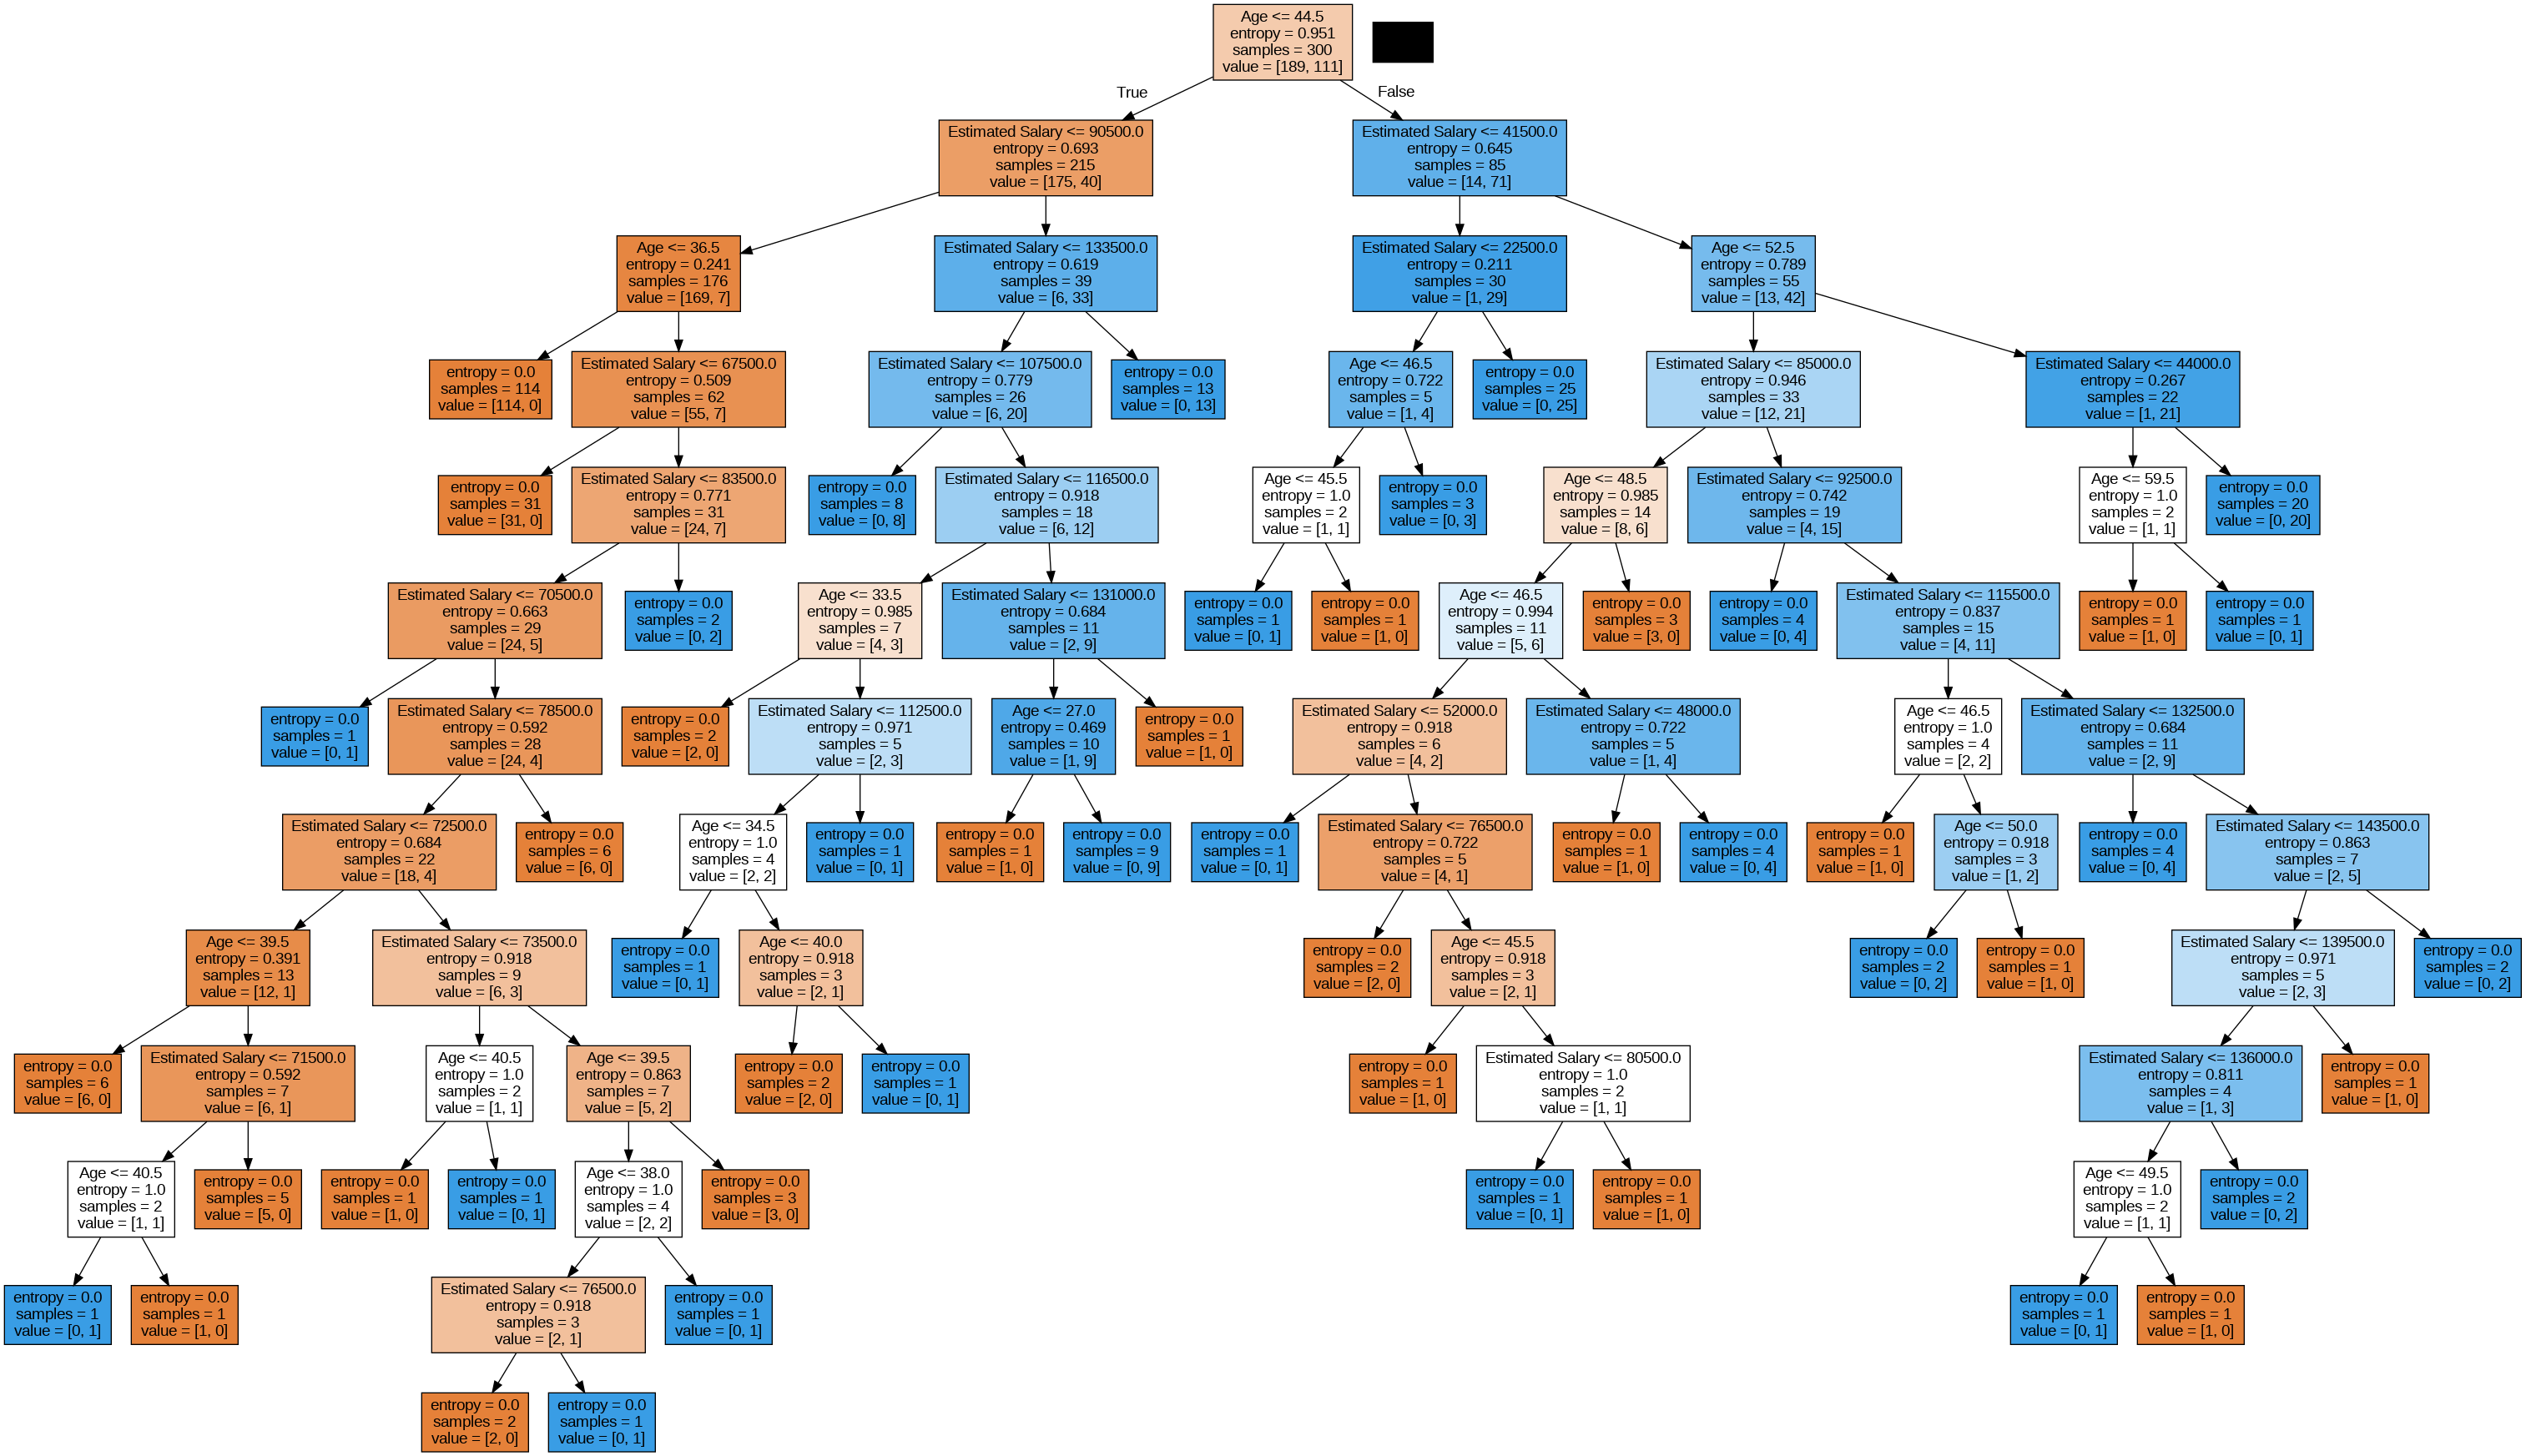

In [44]:
import pydotplus
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())